In [2]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials = {
    'IAM_SERVICE_ID': 'iam-ServiceId-227dbf2e-be73-4b24-bfab-9ccc87419652',
    'IBM_API_KEY_ID': 'NbQ-RfLsYUyOaBguEdGjz3S7PWp894aQqiOzNsH5T39y',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'belajarmlwatson-donotdelete-pr-gajunlgvobqwyn',
    'FILE': 'messy-vs-clean-room.zip'
}

In [3]:
from ibm_botocore.client import Config
import ibm_boto3

cos = ibm_boto3.client(service_name='s3',
                    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
                     ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
                     ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
                     config=Config(signature_version='oauth'),
                     endpoint_url=credentials['ENDPOINT']
                    )
cos.download_file(Bucket=credentials['BUCKET'], Key='messy-vs-clean-room.zip', Filename='messy-vs-clean-room.zip')

In [4]:
import os
os.listdir()

['messy-vs-clean-room.zip', '.virtual_documents']

In [5]:
# melakukan ekstaksi pada file zip
import zipfile

local_zip = 'messy-vs-clean-room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

base_dir = 'images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
os.listdir('images/train')

['clean', 'messy']

In [7]:
os.listdir('images/val')

['clean', 'messy']

In [8]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150
    batch_size=4, # karena klasifikasi 2 kelas maka gunakan class mode binary
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150
    batch_size=4, # karena klasifikasi 2 kelas maka gunakan class mode binary
    class_mode='binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [15]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 8s - loss: 0.7025 - accuracy: 0.4800 - val_loss: 0.6794 - val_accuracy: 0.7000
Epoch 2/20
25/25 - 7s - loss: 0.6623 - accuracy: 0.5900 - val_loss: 0.6454 - val_accuracy: 0.5500
Epoch 3/20
25/25 - 7s - loss: 0.5895 - accuracy: 0.7300 - val_loss: 1.1348 - val_accuracy: 0.5500
Epoch 4/20
25/25 - 7s - loss: 0.7627 - accuracy: 0.5400 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 7s - loss: 0.6542 - accuracy: 0.6700 - val_loss: 0.6893 - val_accuracy: 0.5500
Epoch 6/20
25/25 - 7s - loss: 0.6007 - accuracy: 0.7000 - val_loss: 0.6274 - val_accuracy: 0.7000
Epoch 7/20
25/25 - 6s - loss: 0.6896 - accuracy: 0.6500 - val_loss: 0.6563 - val_accuracy: 0.5500
Epoch 8/20
25/25 - 6s - loss: 0.6514 - accuracy: 0.6100 - val_loss: 0.5505 - val_accuracy: 0.8500
Epoch 9/20
25/25 - 6s - loss: 0.6765 - accuracy: 0.6600 - val_loss: 0.5943 - val_accuracy: 0.7500
Epoch 10/20
25/25 - 7s - loss: 0.5826 - accuracy: 0.7200 - val_loss: 0.5003 - val_accuracy: 0.8000
Epoch 11/20
25/25 -

In [19]:
cos.download_file(Bucket=credentials['BUCKET'],Key='sample2.jpg',Filename="sample2.jpg")


sample2.jpg
messy


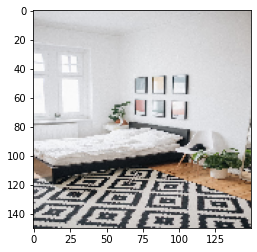

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
# change it to your filename
fn = 'sample2.jpg'
 
# predicting images
path = fn
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  
print(fn)
if classes==0:
  print('clean')
else:
  print('messy')